In [ ]:
#from python.dataframe_builder import df_builder
#import python.query_engine

In [ ]:
#forward_df = df_builder('finishing', 'shooting', 'strength', 'positioning', 'pace', 'heading')

In [ ]:
#forward_df

In [ ]:
#forward_df.to_csv('forward.csv', index=False)

In [ ]:
#shooting_df

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

import sys
from IPython.core import ultratb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
fifa_df = pd.read_csv('write_data/all_players.csv')

In [ ]:
fifa_df.columns = [name.lower().replace(' ', '_') for name in fifa_df.columns]

In [ ]:
gk_df = fifa_df[fifa_df['position'] == 'GK']

In [ ]:
field_df = fifa_df[fifa_df['position'] != 'GK']
field_df.head(20)

In [ ]:
gk_df.head(20)

In [ ]:
fifa_clean_df = fifa_df.drop(columns=['unnamed:_0', 'club',
                                     'league','nationality', 'position',
                                      'age','preferred_foot','attacking_workrate',
                                      'defensive_workrate',
                                      'skill_moves', 'weak_foot']).set_index('player_name')

In [ ]:
fifa_clean_df.columns

In [ ]:
fifa_df.loc[fifa_df['position'] == 'GK'].describe()

In [ ]:
fifa_clean_df.columns

In [ ]:
fifa_clean_df.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
fifa_clean_df.loc[fifa_clean_df[''] == 'Benlamri']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(fifa_clean_df,y, test_size=0.33, random_state=42)
pca = PCA(n_components=2, random_state=10)

#sprint_speed 
pca.fit(fifa_clean_df)


In [1]:
# load necessary modules ----
import pandas as pd
import numpy as np
import sys
from IPython.core import ultratb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ensure error messages are color coded using IPython color schema ----
sys.excepthook = ultratb.FormattedTB(mode="Verbose",
                                     color_scheme="Linux",
                                     call_pdb=False)

# load necessary data ----
fifa_df = pd.read_csv("write_data/all_players.csv")

# store relevant columns ----
relevant_columns = ['pace',
        'acceleration', 'sprint_speed', 'dribbling', 'agility', 'balance',
        'reactions', 'ball_control', 'composure', 'shooting', 'positioning',
        'finishing','shot_power', 'long_shots', 'volleys', 'penalties', 'passing',
        'vision', 'crossing', 'free_kick', 'short_pass', 'long_pass',
        'pass_curve', 'defending', 'interceptions', 'heading', 'marking', 
        'standing_tackle', 'sliding_tackle', 'physicality',
        'jumping', 'stamina', 'strength', 'aggression', 'diving', 'reflexes',
        'handling', 'speed', 'kicking', 'positoning']

field_all_columns = ['pace',
        'acceleration', 'sprint_speed', 'dribbling', 'agility', 'balance',
        'reactions', 'ball_control', 'composure', 'shooting', 'positioning',
        'finishing','shot_power', 'long_shots', 'volleys', 'penalties', 'passing',
        'vision', 'crossing', 'free_kick', 'short_pass', 'long_pass',
        'pass_curve', 'defending', 'interceptions', 'heading', 'marking', 
        'standing_tackle', 'sliding_tackle', 'physicality',
        'jumping', 'stamina', 'strength', 'aggression']

field_indi_columns = [
        'acceleration', 'sprint_speed', 'agility', 'balance',
        'reactions', 'ball_control', 'composure', 'positioning',
        'finishing','shot_power', 'long_shots', 'volleys', 'penalties',
        'vision', 'crossing', 'free_kick', 'short_pass', 'long_pass',
        'pass_curve', 'interceptions', 'heading', 'marking', 
        'standing_tackle', 'sliding_tackle',
        'jumping', 'stamina', 'strength', 'aggression']

agg_columns = ['pace', 'shooting', 'defending', 'passing', 'dribbling',
               'physicality']

gk_columns = ['diving', 'reflexes',
        'handling', 'speed', 'kicking', 'positoning']

# clean up data frame to only contain continuous variables ----
fifa_df.columns = [name.lower().replace(" ", "_")
                   for name in fifa_df.columns]

# split data into field players and goalkeepers

gk_df = fifa_df[fifa_df['position'] == 'GK']

field_df = fifa_df[fifa_df['position'] != 'GK']

# clean up data by dropping unnecessary columns ___
field_clean_df = field_df.drop(columns=['unnamed:_0', 'club',
                                     'league','nationality', 'position',
                                      'age','preferred_foot','attacking_workrate',
                                      'defensive_workrate',
                                      'skill_moves', 'weak_foot']
                                      ).set_index('player_name')


gk_clean_df = gk_df.drop(columns=['unnamed:_0', 'club',
                                     'league','nationality', 'position',
                                      'age','preferred_foot','attacking_workrate',
                                      'defensive_workrate',
                                      'skill_moves', 'weak_foot']
                                      ).set_index('player_name')


field_clean_df = (field_clean_df
           .filter(field_indi_columns)
           .dropna())

gk_clean_df = (gk_clean_df
           .filter(gk_columns)
           .dropna())

//anaconda3/envs/fifa-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
gk_clean_arr = gk_clean_df.to_numpy()

In [24]:
 # instatiate PCA object ----
pca = PCA(n_components=2, random_state=10)

        # fit fifa_df onto pca ----
pca.fit(gk_clean_arr)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=10,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
gk_pca_df = pd.DataFrame({'pc1': np.matmul(gk_clean_arr, pca.components_[0]),
                     'pc2': np.matmul(gk_clean_arr, pca.components_[1])}, index=gk_clean_df.index)

In [29]:
gk_pca_df.head()

,pc1,pc2
player_name,,
David De Gea Quintana,204.987114,-22.501203
Manuel Neuer,206.718879,-25.644151
Thibaut Courtois,196.607188,-30.346081
Jan Oblak,197.784472,-34.137362
Marc-André ter Stegen,196.210906,-38.488205


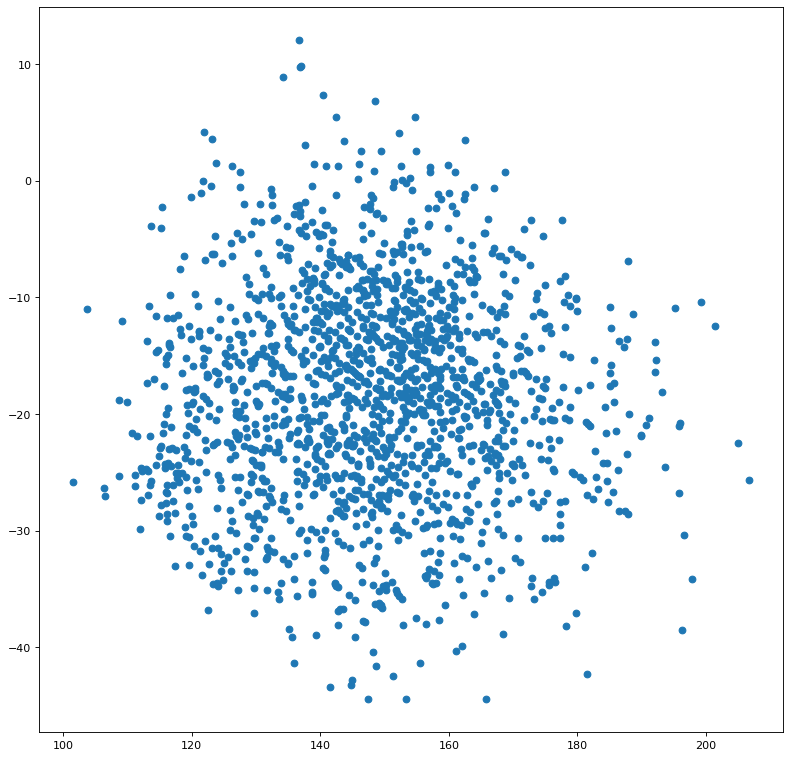

In [37]:

plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(gk_pca_df['pc1'],gk_pca_df['pc2']);

In [38]:
from sklearn.cluster import KMeans # import from sklearn
model_gk = KMeans(n_clusters=3).fit(gk_pca_df)
#k_means = KMeans(n_clusters=6) # Must set number of clusters at initialization time!
#k_means.fit(pca_df) # Run the clustering algorithm
model_gk.cluster_centers_

array([[170.86963879, -20.53007517],
       [126.84848543, -20.20438455],
       [148.92019622, -16.56367095]])

In [40]:
cluster_assignments_gk = model_gk.predict(gk_pca_df) # Generate cluster index values for each row in df
cluster_assignments_gk

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

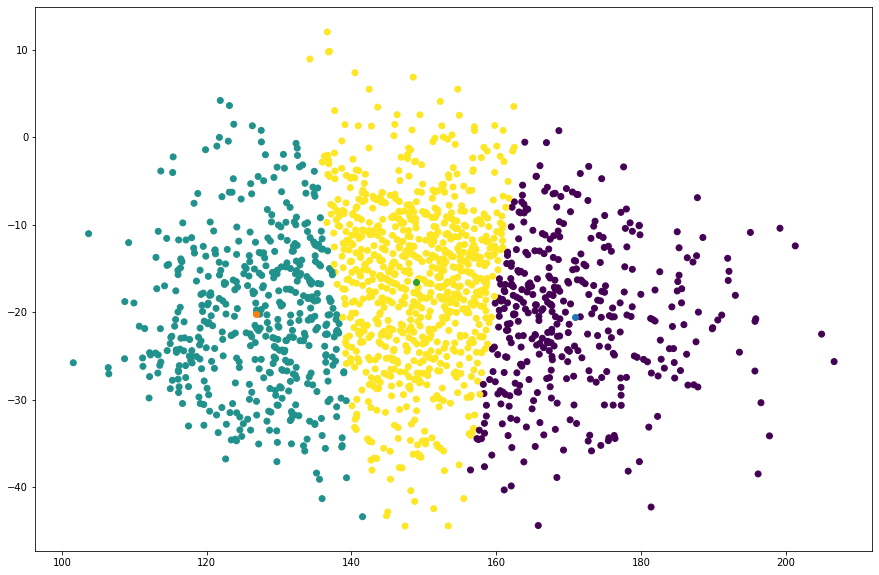

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(gk_pca_df['pc1'], gk_pca_df['pc2'], c=model_gk.labels_)
for i in range(len(model_gk.cluster_centers_)):
    plt.scatter(model_gk.cluster_centers_[i][0], model_gk.cluster_centers_[i][1]);

In [43]:
def elbow_test(df):

    X = df
    distortions = []

# Calculate SSE for different K
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state = 10)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

# Plot values of SSE
    plt.figure(figsize=(15,8))
    plt.subplot(121, title='Elbow curve')
    plt.xlabel('k')
    plt.plot(range(2, 10), distortions)
    plt.grid(True)

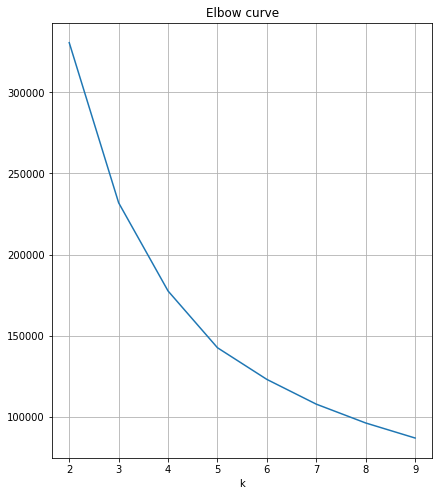

In [44]:
elbow_test(gk_pca_df)

In [27]:
field_clean_arr = field_clean_df.to_numpy()

In [34]:
 pca = PCA(n_components=2, random_state=10)

        # fit fifa_df onto pca ----
pca.fit(field_clean_arr)

field_pca_df = pd.DataFrame({'pc1': np.matmul(field_clean_arr, pca.components_[0]),
                            'pc2': np.matmul(field_clean_arr, pca.components_[1])},
                           index=field_clean_df.index)

In [30]:
field_pc_df.head()

,pc1,pc2
player_name,,
Lionel Messi,264.156161,291.863413
C. Ronaldo dos Santos Aveiro,247.994613,292.593855
Kevin De Bruyne,212.331170,342.311598
Luis Suárez,222.932452,316.509823
Sergio Ramos García,115.454067,351.880629


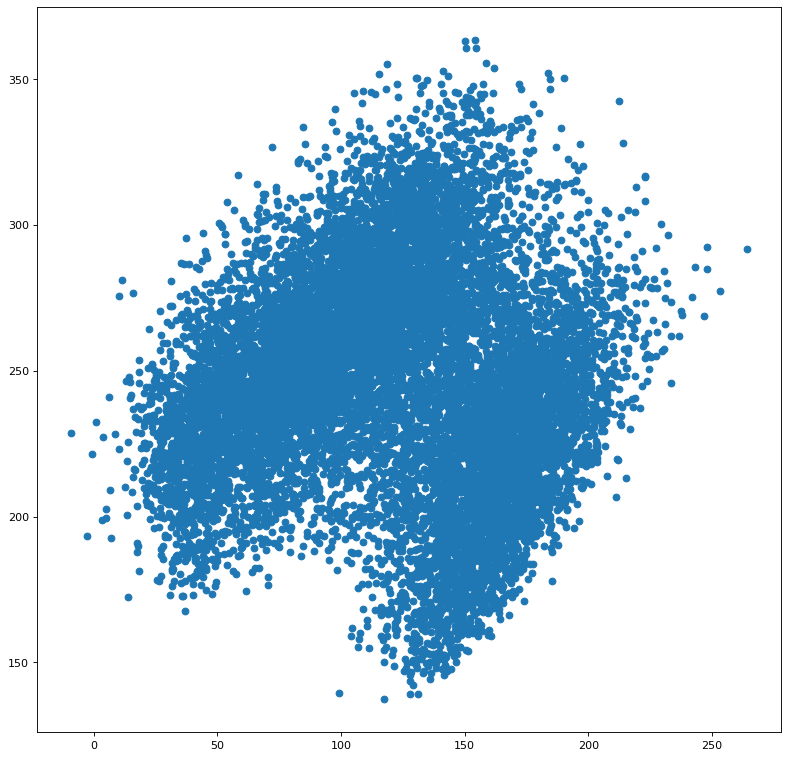

In [36]:
plt.figure(figsize=(12, 12), dpi=80)

plt.scatter(field_pca_df['pc1'],field_pca_df['pc2']);



In [50]:

model_field = KMeans(n_clusters=5).fit(field_pca_df)
#k_means = KMeans(n_clusters=6) # Must set number of clusters at initialization time!
#k_means.fit(pca_df) # Run the clustering algorithm
model_field.cluster_centers_

array([[134.87793809, 298.02942083],
       [ 97.70841052, 261.16663374],
       [148.06296674, 197.43310467],
       [ 53.2161893 , 227.63730857],
       [177.27215601, 245.2778193 ]])

In [51]:
cluster_assignments_field = model_field.predict(field_pca_df) # Generate cluster index values for each row in df
cluster_assignments_field

array([4, 4, 0, ..., 2, 3, 3], dtype=int32)

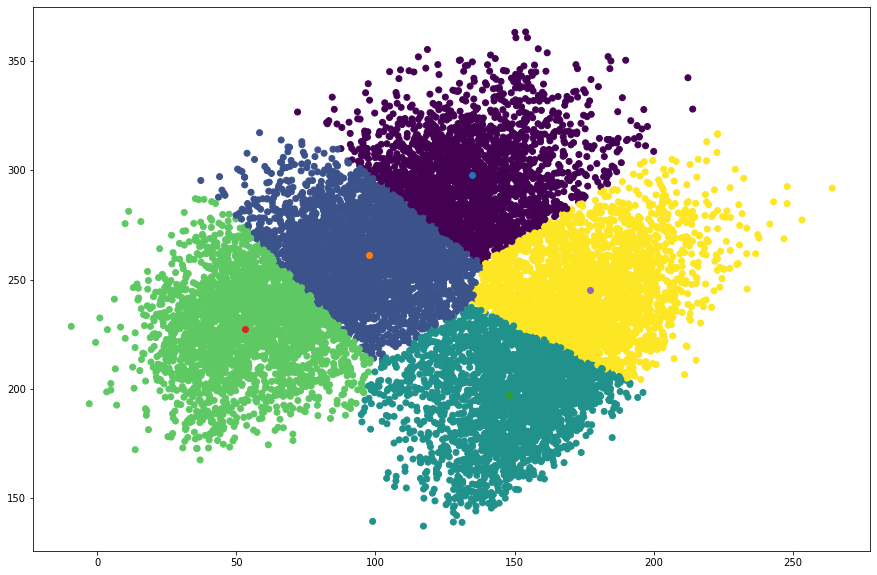

In [52]:
plt.figure(figsize=(15,10))
plt.scatter(field_pca_df['pc1'], field_pca_df['pc2'], c=model_field.labels_)
for i in range(len(model_field.cluster_centers_)):
    plt.scatter(model_field.cluster_centers_[i][0], model_field.cluster_centers_[i][1]);

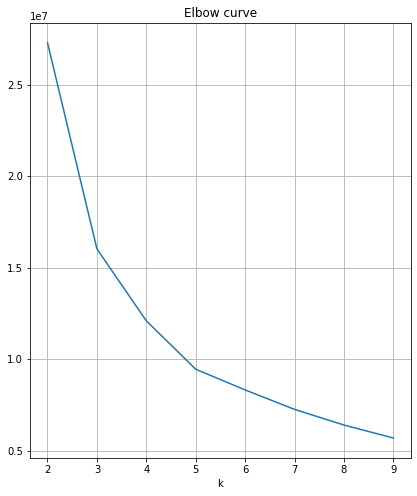

In [49]:
elbow_test(field_pca_df)

In [2]:
fifa_clean_df = fifa_df.drop(columns=['unnamed:_0', 'club',
                                     'league','nationality', 'position',
                                      'age','preferred_foot','attacking_workrate',
                                      'defensive_workrate',
                                      'skill_moves', 'weak_foot']
                                      ).set_index('player_name')

In [3]:
fifa_clean_df = (fifa_clean_df
           .filter(relevant_columns)
           .dropna())

In [4]:
fifa_scaled_df = (StandardScaler()
                  .fit(fifa_clean_df).
                  transform(fifa_clean_df))

In [9]:
pca = PCA(n_components=2, random_state=10)

# fit fifa_df onto pca ----
pca.fit(fifa_clean_df)

pc_df = pd.DataFrame({'pc1': np.matmul(fifa_clean_df, pca.components_[0]),
                     'pc2': np.matmul(fifa_clean_df, pca.components_[1])},
                     index=fifa_df.index)

ValueError: Shape of passed values is (15397, 1), indices imply (15397, 40)

In [8]:
pc_df.head()

,pc1,pc2
0,-8.084029,-6.149277
1,-7.991448,-4.578625
2,-8.435233,-2.315545
3,-8.037760,-2.945716
4,-6.542249,2.891631


In [14]:
fifa_clean_arr = fifa_clean_df.to_numpy()

In [15]:
pca = PCA(n_components=2, random_state=10)

# fit fifa_df onto pca ----
pca.fit(fifa_clean_arr)

pc_df = pd.DataFrame({'pc1': np.matmul(fifa_clean_arr, pca.components_[0]),
                     'pc2': np.matmul(fifa_clean_arr, pca.components_[1])},
                     index=fifa_df.index)

In [16]:
pc_df.head()

,pc1,pc2
0,-373.250541,-129.512055
1,-373.862125,-111.278854
2,-388.609553,-55.067721
3,-381.213499,-73.951734
4,-364.183826,47.650116


In [18]:
import matplotlib.pyplot as plt

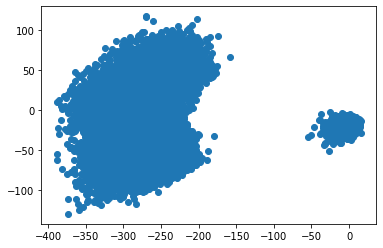

In [20]:
plt.scatter(pc_df['pc1'],pc_df['pc2']);